<a href="https://colab.research.google.com/github/MarasaniJhansi/Alzheimer-s-Disease-Classification-using-InceptionV3/blob/main/Efficent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: Datasets/Non_Demented/non_demented_1585.jpg  
  inflating: Datasets/Non_Demented/non_demented_1586.jpg  
  inflating: Datasets/Non_Demented/non_demented_1587.jpg  
  inflating: Datasets/Non_Demented/non_demented_1588.jpg  
  inflating: Datasets/Non_Demented/non_demented_1589.jpg  
  inflating: Datasets/Non_Demented/non_demented_159.jpg  
  inflating: Datasets/Non_Demented/non_demented_1590.jpg  
  inflating: Datasets/Non_Demented/non_demented_1591.jpg  
  inflating: Datasets/Non_Demented/non_demented_1592.jpg  
  inflating: Datasets/Non_Demented/non_demented_1593.jpg  
  inflating: Datasets/Non_Demented/non_demented_1594.jpg  
  inflating: Datasets/Non_Demented/non_demented_1595.jpg  
  inflating: Datasets/Non_Demented/non_demented_1596.jpg  
  inflating: Datasets/Non_Demented/non_demented_1597.jpg  
  inflating: Datasets/Non_Demented/non_demented_1598.jpg  
  inflating: Datasets/Non_Demented/non_demented_1599.jpg  
  infl

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders

# Provide the input folder containing your data and the output folder where you want to save the split data
input_folder = 'Datasets'
output_folder = '/content/dataset/'

# Specify the ratio for splitting (in this case, 80% for training and 20% for testing)
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.8, .2), group_prefix=None)


Copying files: 10699 files [00:01, 7545.77 files/s]


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Constants and parameters
SEED = 1
BATCH_SIZE = 32
IMG_SIZE = (128, 128)
INPUT_SHAPE = IMG_SIZE + (3,)
train_data_dir = '/content/dataset/train'  # Replace this with the path to your 'Datasets' folder
test_data_dir = '/content/dataset/val'
epochs = 20

# Load and preprocess the data
X_train = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
)

X_test = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle = False
)

# Load EfficientNetB0 model with pre-trained weights on ImageNet
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=INPUT_SHAPE)

# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Build the model
model = tf.keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')  # Assuming 4 classes for Alzheimer's prediction
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
# Train the model
history = model.fit(X_train, validation_data=X_test, epochs=epochs, callbacks=[early_stopping])



Found 8559 files belonging to 4 classes.
Found 2140 files belonging to 4 classes.
Epoch 1/20
268/268 [==============================] - 16s 35ms/step - loss: 1.1741 - accuracy: 0.5567 - val_loss: 0.8001 - val_accuracy: 0.6178
Epoch 2/20
268/268 [==============================] - 9s 33ms/step - loss: 0.7243 - accuracy: 0.6754 - val_loss: 0.7063 - val_accuracy: 0.6720
Epoch 3/20
268/268 [==============================] - 9s 32ms/step - loss: 0.6345 - accuracy: 0.7156 - val_loss: 0.6443 - val_accuracy: 0.7070
Epoch 4/20
268/268 [==============================] - 8s 29ms/step - loss: 0.6025 - accuracy: 0.7334 - val_loss: 0.6061 - val_accuracy: 0.7346
Epoch 5/20
268/268 [==============================] - 10s 36ms/step - loss: 0.5719 - accuracy: 0.7444 - val_loss: 0.5882 - val_accuracy: 0.7379
Epoch 6/20
268/268 [==============================] - 9s 34ms/step - loss: 0.5329 - accuracy: 0.7716 - val_loss: 0.7045 - val_accuracy: 0.7023
Epoch 7/20
268/268 [==============================] - 8s 2

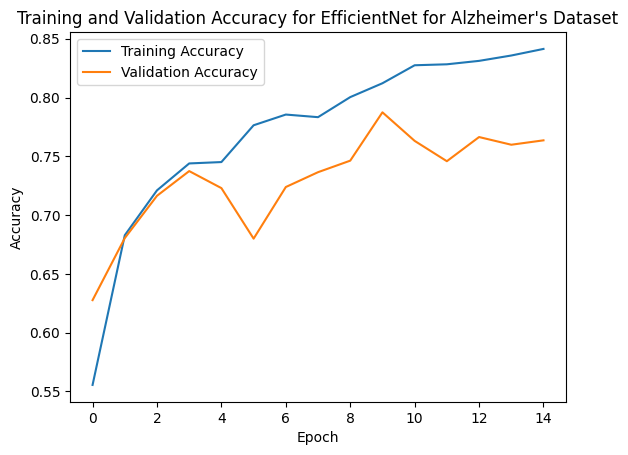

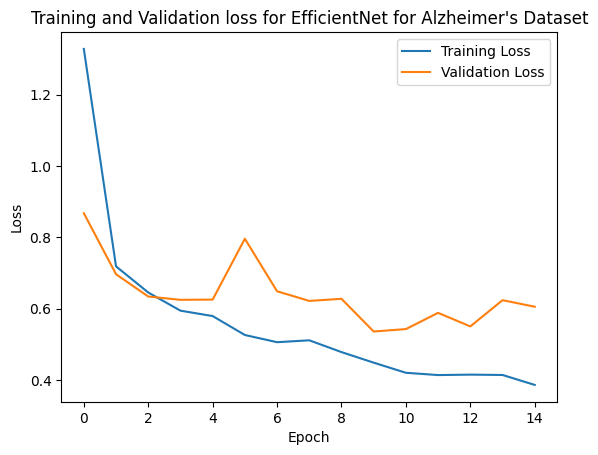

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Training and Validation Accuracy for EfficientNet for Alzheimer's Dataset")
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Training and Validation loss for EfficientNet for Alzheimer's Dataset")
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test)

print(f'Test Accuracy: {test_acc}')
print(f'Test Loss: {test_loss}')

# Confusion Matrix and Classification Report
y_true = []
y_pred = []

for images, labels in X_test:
    y_true.extend(labels.numpy())
    predictions = np.argmax(model.predict(images), axis=1)
    y_pred.extend(predictions)

conf_mat = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred)

print("Confusion Matrix:\n", conf_mat)
print("\nClassification Report:\n", class_report)



67/67 [==============================] - 2s 25ms/step - loss: 0.5074 - accuracy: 0.8089
Test Accuracy: 0.808878481388092
Test Loss: 0.5073791742324829
1/1 [==============================] - 1s 1s/step
Confusion Matrix:
 [[387   2  19  92]
 [  0 506   0   4]
 [ 37   1 344 148]
 [ 41   0  65 494]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       500
           1       0.99      0.99      0.99       510
           2       0.80      0.65      0.72       530
           3       0.67      0.82      0.74       600

    accuracy                           0.81      2140
   macro avg       0.82      0.81      0.81      2140
weighted avg       0.82      0.81      0.81      2140

